# 2-1. 기본 용어와 맛보기

## 1. 데이터 용어
### 샘플 공간 (sample space)
- 측정 가능한 모든 결과
- 이상치 여부 판별
- 데이터의 의미 확인

### 변수의 종류
- 종속변수 (결과변수)
  - 독리변수의 값이 변함에 따라 달라지는 변수 ($y$)
  - 모델링하고자 하는 수리적, 통계적 행동의 결과
- 독립변수
  - 실험에서 직접 변경하는 변수 ($x$)
  - 데이터의 특징
- 예측의 경우, 독립변수에 대한 종속변수의 응답을 모델링하는 것임

### 데이터 형태
1. 카테고리/숫자: 질적, 순서가 없음
2. 카테고리/순서: 질적, 순서가 있음
3. 숫자/이산: 수적, 유한 or 무한
4. 숫자/연속: 수적, 특정 구간

#### 원-핫 인코딩
- 고유값=1, 나머지=0
- 0으로 이루어진 벡터에 하나의 1만 존재하는 방식으로 데이터의 값을 구별

## 2. 통계량
1. 위치
   - 평균
   - 중앙값
   - 최빈값
   - ...
2. 분포
   - 데이터가 퍼져있는 정도
3. 모양
   - 편향(bias)의 방향
4. 상관관계
   - 변수가 다른 변수에 얼마나 의존하는가에 대한 측정 값
   - 피어슨 상관계수, ...

### p-value
- 귀무가설(틀릴것이라고 예상하는 가설)이 맞다는 전제 하에, 실제 통계치와 같거나 극단적인 통계치가 관측될 확률
- 0.05나 0.01 보다 작은 경우 귀무가설을 기각하고, 대립가설을 채택하는 것이 관례
- 0.05~0.005 이하에서 P값에서 유의미하다라는 표현을 사용

## 3. 맛보기

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [19]:
# Data Load (seaborn 데이터셋 사용)
iris_data = sns.load_dataset("iris")

In [20]:
print(iris_data.shape)
iris_data.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


4개의 독립 변수(sepal_length, sepal_width, petal_length, petal_width)와 1개의 종속 변수(species)로 볼 수 있음  

In [21]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


`describe` 메서드를 통해, 기본적인 통계량을 확인 할 수 있음

### TODO: 그래프 해석해보기

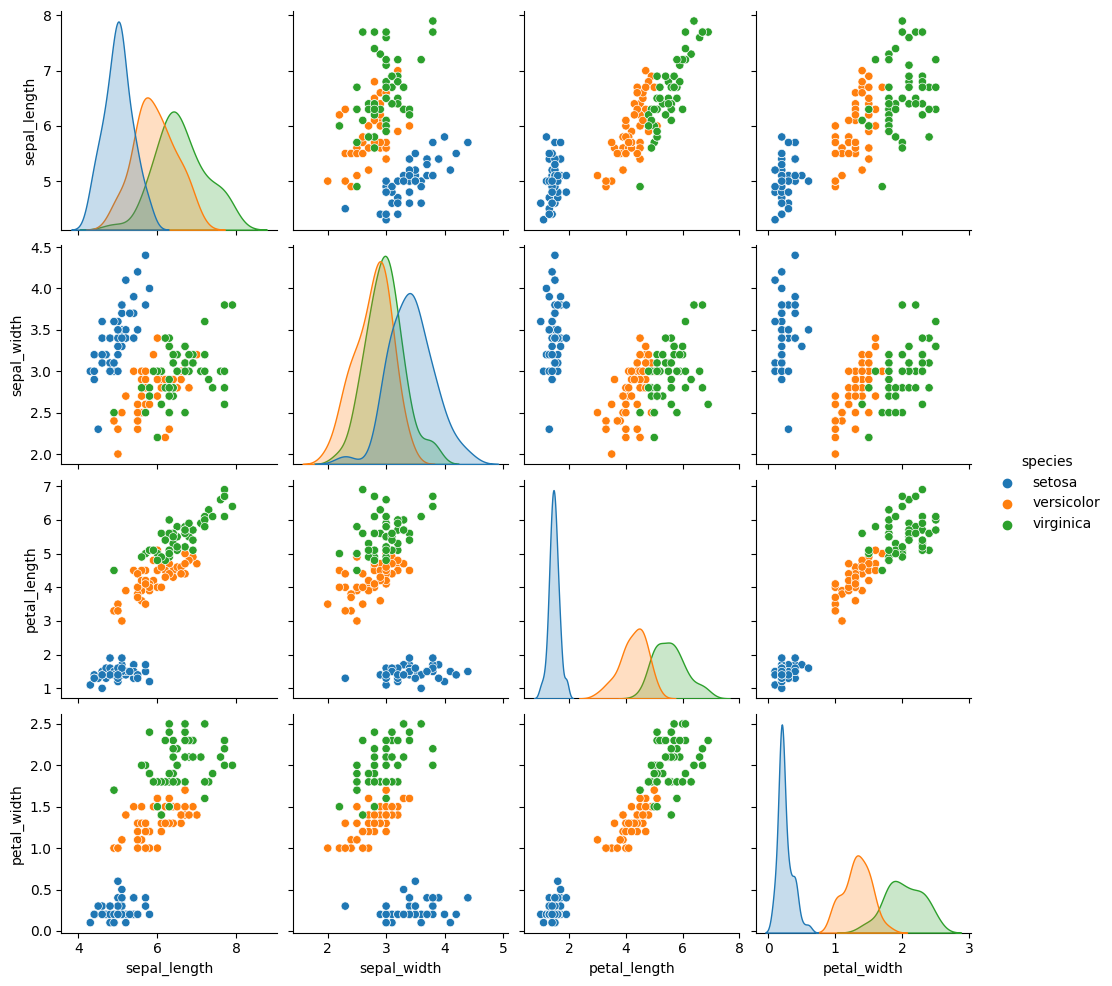

In [23]:
sns.pairplot(iris_data, hue="species");

### PCA와 LDA
- 비슷한 정보를 좀 더 작은 수의 차원으로 표현
- 가장 전체적(일반적)이거나 중요한 변화의 축을 회전하는 등의 변환

#### PCA (주성분 분석)
- 가장 높은 변동의 축을 조정

In [24]:
pca = PCA(n_components=2)
out_pca = pca.fit_transform(iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

pca_df = pd.DataFrame(out_pca, columns=["PCA1", "PCA2"])

In [25]:
print(pca_df.shape)
pca_df.head()

(150, 2)


,PCA1,PCA2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


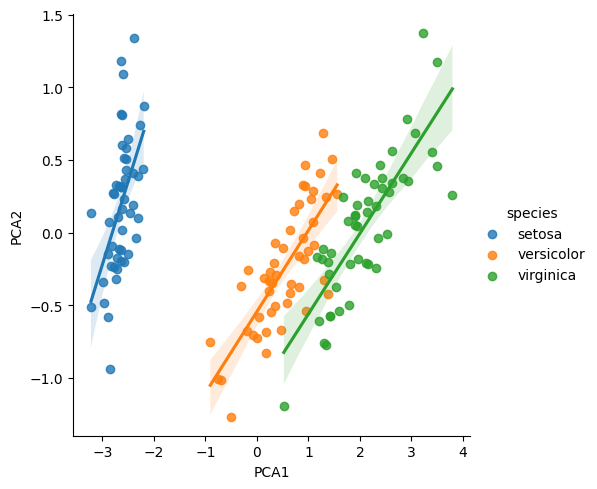

In [26]:
pca_df = pd.concat([pca_df, iris_data["species"]], axis=1)
sns.lmplot(data=pca_df, x="PCA1", y="PCA2", hue="species");

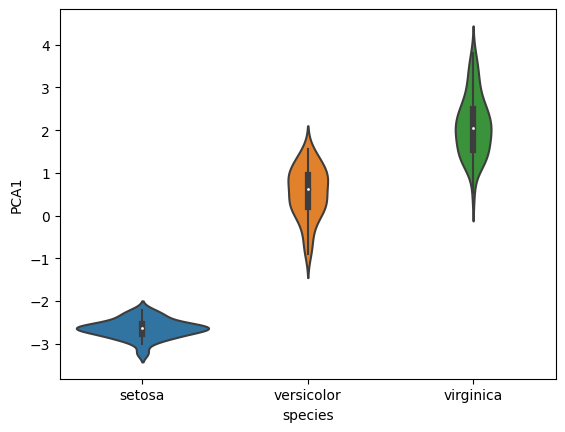

In [27]:
sns.violinplot(data=pca_df, x="species", y="PCA1");

PCA는 데이터를 가장 큰 변동이 있는 방형으로 맞추지만, 그 과정에서 중요한 정보를 무시하는 경향이 있음

#### LDA(선형 판별 분석)
- 레이블별로 그룹을 지정하고, 클래스별로 가장 많은 분리를 생성하는 방향을 찾음

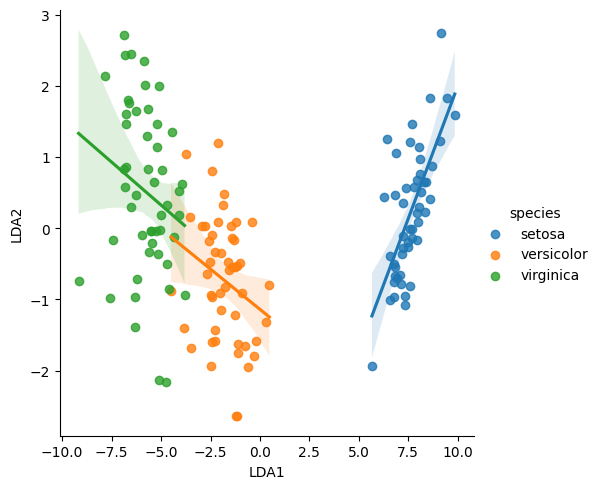

In [28]:
LDA = LinearDiscriminantAnalysis(n_components=2)

out_lda = LDA.fit_transform(X=iris_data.iloc[:, :4], y=iris_data["species"])
lda_df = pd.DataFrame(out_lda, columns=["LDA1", "LDA2"])
lda_df = pd.concat([lda_df, iris_data["species"]], axis=1)

sns.lmplot(data=lda_df, x="LDA1", y="LDA2", hue="species");

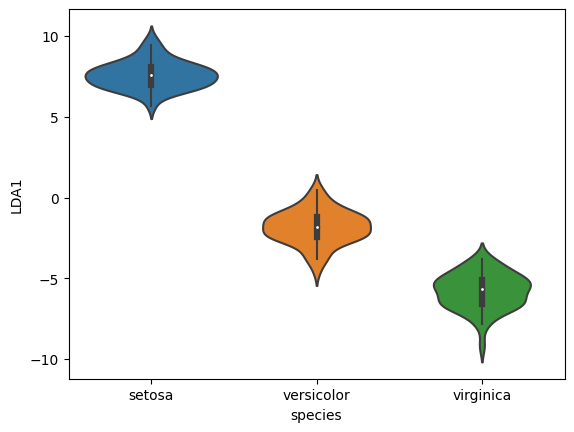

In [29]:
sns.violinplot(data=lda_df, x="species", y="LDA1");

## iris 분류

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [31]:
# RAW
raw_train, raw_test = train_test_split(iris_data, test_size=0.3)
# PCA
pca_train, pca_test = train_test_split(pca_df, test_size=0.3)
# LDA
lda_train, lda_test = train_test_split(lda_df, test_size=0.3)

In [32]:
# RAW
clf = RandomForestClassifier(n_estimators=2, random_state=42)
clf.fit(raw_train.iloc[:, :4], raw_train.iloc[:, 4])
# 예측
pred_raw = clf.predict(raw_test.iloc[:, :4])
# 결과
(pred_raw==raw_test.iloc[:, 4]).sum()/len(raw_test)

0.9333333333333333

In [33]:
# PCA
clf = RandomForestClassifier(n_estimators=2, random_state=42)
clf.fit(pca_train.iloc[:, :2], pca_train.iloc[:, 2])
# 예측
pred_pca = clf.predict(pca_test.iloc[:, :2])
# 결과
(pred_pca==pca_test.iloc[:, 2]).sum()/len(pca_test)

0.8444444444444444

In [34]:
# LDA
clf = RandomForestClassifier(n_estimators=2, random_state=42)
clf.fit(lda_train.iloc[:, :2], lda_train.iloc[:, 2])
# 예측
pred_lda = clf.predict(lda_test.iloc[:, :2])
# 결과
(pred_lda==lda_test.iloc[:, 2]).sum()/len(lda_test)

0.9111111111111111

## 추가 참고
1. Pandas: https://nuyhc.github.io/posts/pandas-cookbook-sum/
2. Seaborn: https://nuyhc.github.io/posts/seaborn_sum/
3. 통계 기초: https://nuyhc.github.io/posts/static-basic/
4. PCA/LDA: https://nuyhc.github.io/posts/dim_reduction/